In [4]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from scipy import misc
from imageio import imread, imsave
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [40]:
def anisdiff_bw(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    # Pad and copy
    U = np.pad(U, ((1,1),(1,1)), mode='edge')
    Un = np.zeros_like(U)
    
    # Iterate through N
    for n in range(1,N):
        Un[1:-1,1:-1] = U[1:-1,1:-1] + lambda_*(g(np.abs(U[0:-2,1:-1] - U[1:-1,1:-1])) * (U[0:-2,1:-1] - U[1:-1,1:-1]) +
                                                 g(np.abs(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1]) +
                                                 g(np.abs(U[1:-1,0:-2] - U[1:-1,1:-1])) * (U[1:-1,0:-2] - U[1:-1,1:-1]) +
                                                 g(np.abs(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:] - U[1:-1,1:-1]))
        U = Un
    
    return U[1:-1,1:-1]

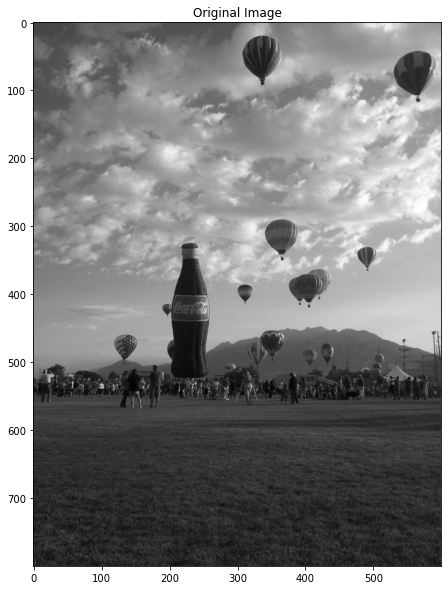

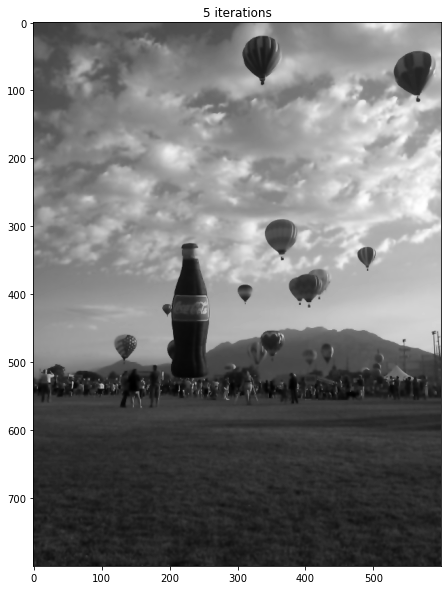

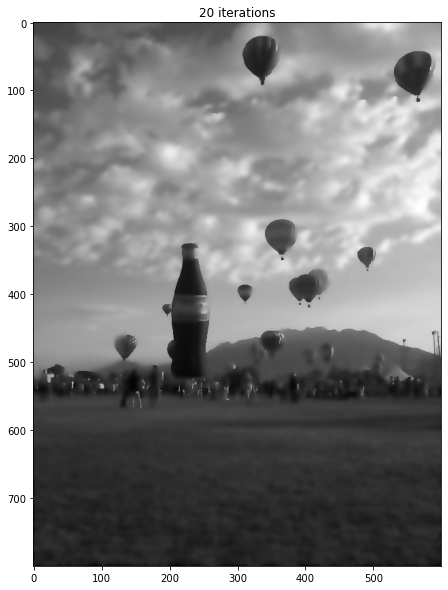

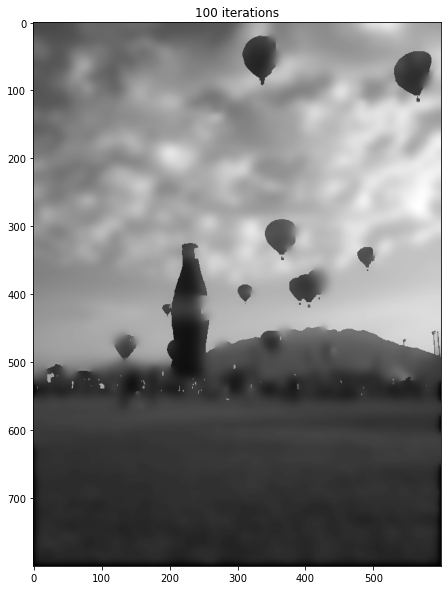

In [41]:
# Show original image
picture = imread('balloon.jpg', as_gray=True) * 1/255
plt.imshow(picture, cmap=cm.gray)
plt.title("Original Image")
plt.show()

# Set parameters
sigma = .1
g = lambda x: np.exp(-(x/sigma)**2)
lam = .25

# Go through different n and
for n in [5,20,100]:
    U = anisdiff_bw(picture,n,lam,g)
    plt.imshow(U, cmap=cm.gray)
    plt.title(str(n)+" iterations")
    plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [42]:
def anisdiff_color(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    # Pad copy and define norm
    U = np.pad(U, ((1,1),(1,1),(0,0)), mode='edge')
    Un = np.zeros_like(U)
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    
    # Iterate through n
    for n in range(1,N):
        Un[1:-1,1:-1] = U[1:-1,1:-1] + lambda_*(g(norm(U[0:-2,1:-1] - U[1:-1,1:-1])) * (U[0:-2,1:-1] - U[1:-1,1:-1]) +
                                                 g(norm(U[2:,1:-1] - U[1:-1,1:-1])) * (U[2:,1:-1] - U[1:-1,1:-1]) +
                                                 g(norm(U[1:-1,0:-2] - U[1:-1,1:-1])) * (U[1:-1,0:-2] - U[1:-1,1:-1]) +
                                                 g(norm(U[1:-1,2:] - U[1:-1,1:-1])) * (U[1:-1,2:] - U[1:-1,1:-1]))
                                                
        U = Un
    
    
    return U[1:-1,1:-1]


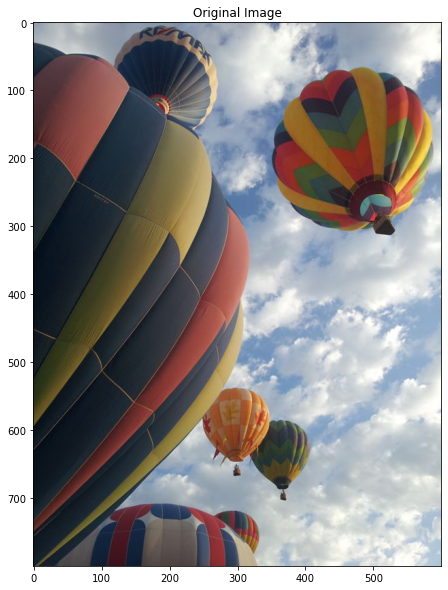

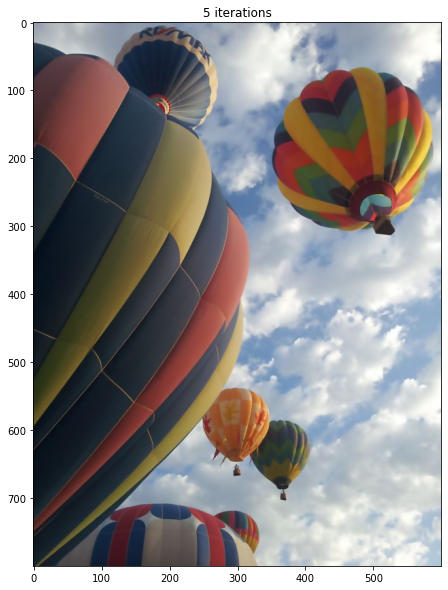

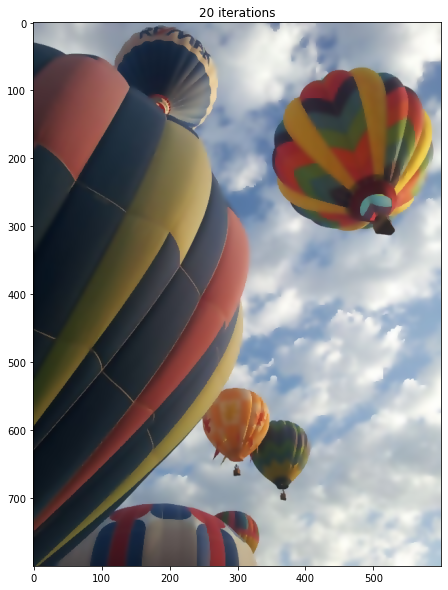

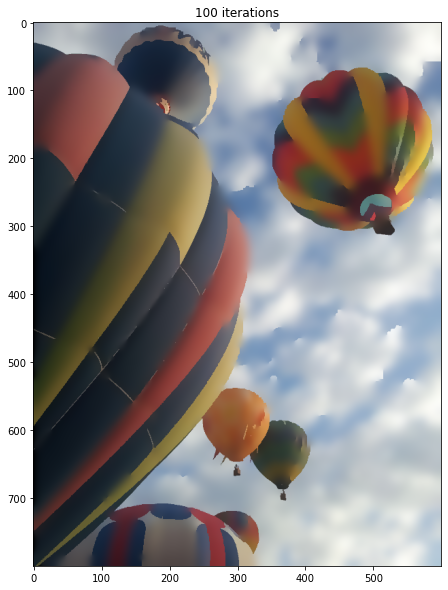

In [43]:
# Original image
picture = imread('balloons_color.jpg', as_gray=False) * 1/255
plt.imshow(picture)
plt.title("Original Image")
plt.show()
sigma = .1
g = lambda x: np.exp(-(x/sigma)**2)
lam = .25

# Go through n iterations and show
for n in [5,20,100]:
    U = anisdiff_color(picture,n,lam,g)
    plt.imshow(U)
    plt.title(str(n)+" iterations")
    plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

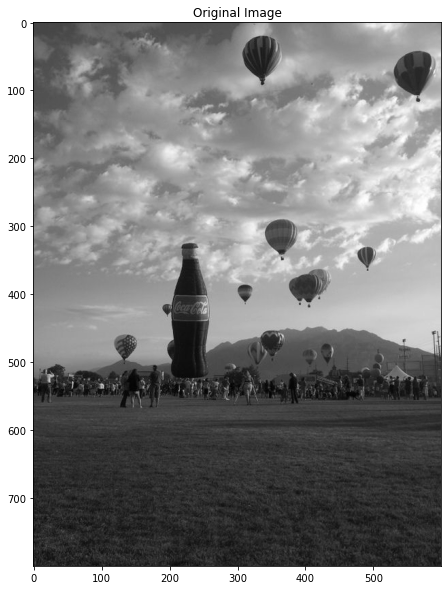

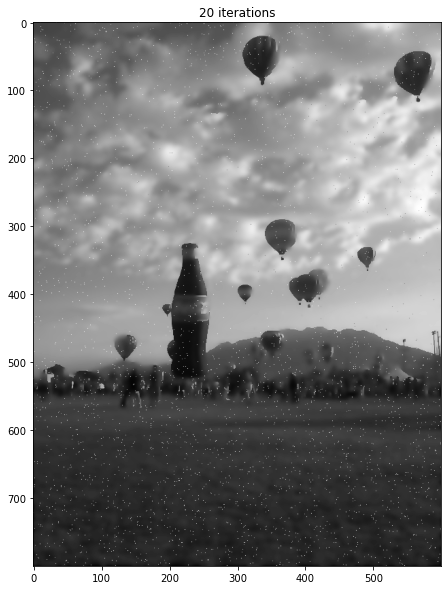

In [44]:
image = imread('balloon.jpg', as_gray=True)

# Plot original image then add noise
plt.imshow(image, cmap=cm.gray)
plt.title("Original Image")
plt.show()
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
    
# Rescale even though I don't have to
image = image * 1/255
    
# Plot noisy image
N = 20
U = anisdiff_bw(image,N,lam,g)
plt.imshow(U, cmap=cm.gray)
plt.title(str(N)+" iterations")
plt.show()

Because the diffusion is meant to preserve edges but the noise seems like a boundary so it won't catch it.

# Problem 4

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [ ]:
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
